<a href="https://colab.research.google.com/github/JuanGranados09/SE-ALES-Y-SISTEMAS/blob/main/Solucion_Parcial_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PREGUNTA 2 : Realice las simulaciones respectivas para graficar el espectro de Fourier del ejercicio 1 (magnitud y fase como diagrama de
Bode en decibelios), y presente el error relativo y la senal reconstruida para ˜ N = {1, 2, . . . , 50}.

Duración del período T= 0.01
Frecuencia angular wo= 628.3185307179587
Frecuencia fundamental Fo= 100.0


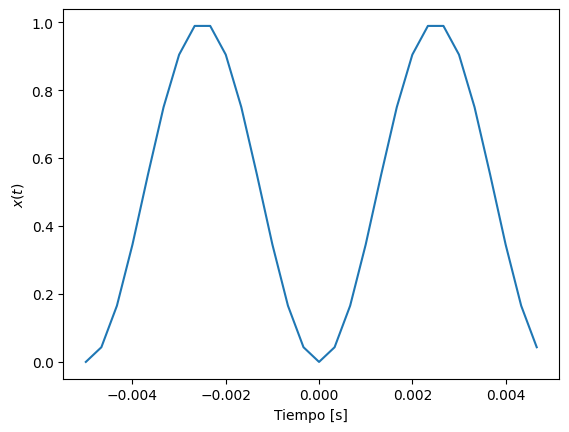

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la señal de entrada
A = 1  # Amplitud de la señal
Fo = 100  # Frecuencia inicial en Hz

# Definición del intervalo de tiempo
ti = -1/(2*Fo)  # Tiempo inicial
tf = 1/(2*Fo)   # Tiempo final
T = tf - ti     # Duración del período de la señal

# Cálculo de la frecuencia angular y la frecuencia fundamental
wo = 2 * np.pi / T  # Frecuencia angular de la señal
Fo = wo / (2 * np.pi)  # Frecuencia fundamental recalculada

# Mostrar valores calculados
print('Duración del período T=', T)
print('Frecuencia angular wo=', wo)
print('Frecuencia fundamental Fo=', Fo)

# Configuración de la frecuencia de muestreo según el criterio de Nyquist
Fs = 30 * Fo  # Frecuencia de muestreo (debe ser al menos el doble de Fo)
tv = np.arange(ti, tf, 1/Fs)  # Generación del vector de tiempo
Nm = len(tv)  # Número de muestras en el tiempo

# Generación de la señal de entrada
xo = (abs(A * np.sin(wo * tv)))**2  # Señal de entrada al cuadrado de la senoide

# Graficar la señal de entrada
plt.plot(tv, xo)
plt.xlabel('Tiempo [s]')
plt.ylabel('$x(t)$')
plt.show()


La señal presenta simetria PAR entonces su espectro de fourier solo tendra componente real

In [2]:
# Simulación del espectro y reconstrucción usando una serie exponencial de Fourier

N = 50  # Número de armónicos
wo = 2 * np.pi / T  # Frecuencia fundamental

# Crear las bases de Fourier
phin = np.zeros((len(tv), 2 * N + 1), dtype=np.complex_)
for n in range(-N, N + 1):
    phin[:, n + N] = np.exp(1j * n * wo * tv)  # Base de Fourier

# Calcular el espectro de la señal
Cn = np.zeros(2 * N + 1, dtype=np.complex_)
Cn[N] = (A**2) / 2  # Componente DC (n=0)
Cn[N-2] = -(A**2) / 4  # Armónico n=-2
Cn[N+2] = -(A**2) / 4  # Armónico n=2


MAGNITUD Y FASE EN DECIBELIOS

<ipython-input-4-a5c419534551>:33: RuntimeWarning: divide by zero encountered in log10
  plt.stem(nv, 20*np.log10(abs(Cn)), 'm')  # Magenta


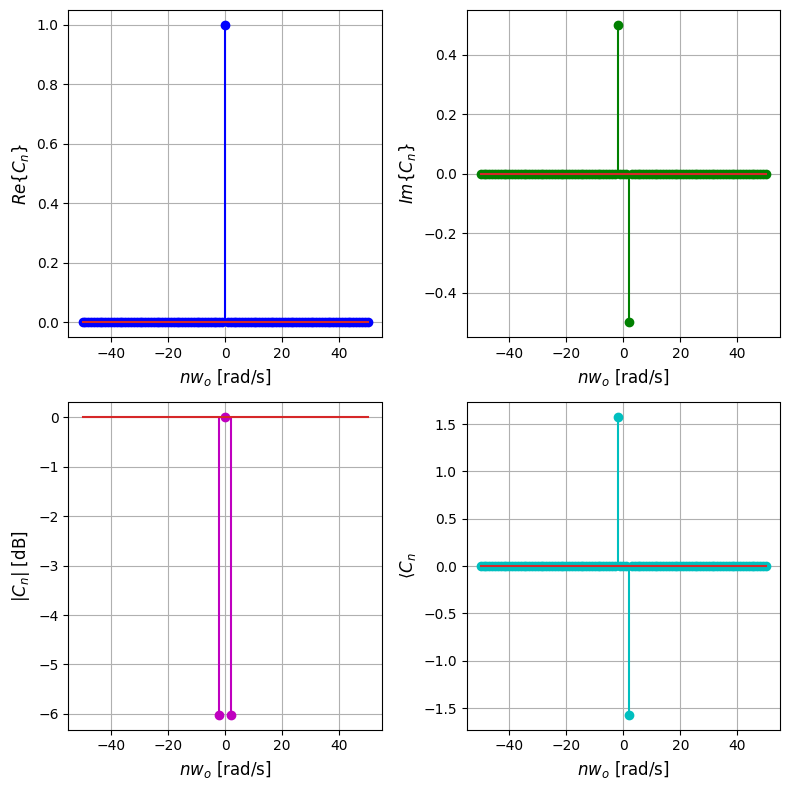

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Definir las variables necesarias
N = 50  # Número de armónicos
nv = np.linspace(-N, N, 2*N + 1)  # Vector de índices de armónicos
Cn = np.zeros(2*N + 1, dtype=np.complex_)  # Inicializar el espectro

# Asignar valores a algunos coeficientes de Fourier para ejemplo
Cn[N] = 1  # Componente DC
Cn[N-2] = 0.5j  # Componente imaginaria negativa
Cn[N+2] = -0.5j  # Componente imaginaria positiva

# Graficar el espectro de Fourier
fig = plt.figure(figsize=(8, 8))

# Parte real del espectro
plt.subplot(2, 2, 1)
plt.stem(nv, np.real(Cn), 'b')  # Azul
plt.xlabel('$nw_o$ [rad/s]', fontsize=12)
plt.ylabel('$Re\{C_n\}$', fontsize=12)
plt.grid(True)

# Parte imaginaria del espectro
plt.subplot(2, 2, 2)
plt.stem(nv, np.imag(Cn), 'g')  # Verde
plt.xlabel('$nw_o$ [rad/s]', fontsize=12)
plt.ylabel('$Im\{C_n\}$', fontsize=12)
plt.grid(True)

# Magnitud del espectro en dB
plt.subplot(2, 2, 3)
plt.stem(nv, 20*np.log10(abs(Cn)), 'm')  # Magenta
plt.xlabel('$nw_o$ [rad/s]', fontsize=12)
plt.ylabel('$|C_n|$ [dB]', fontsize=12)
plt.grid(True)

# Fase del espectro
plt.subplot(2, 2, 4)
plt.stem(nv, np.angle(Cn), 'c')  # Cian
plt.xlabel('$nw_o$ [rad/s]', fontsize=12)
plt.ylabel(r'$\langle C_n$', fontsize=12)
plt.grid(True)

fig.tight_layout()
plt.show()



SEÑAL RECONSTRUIDA

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


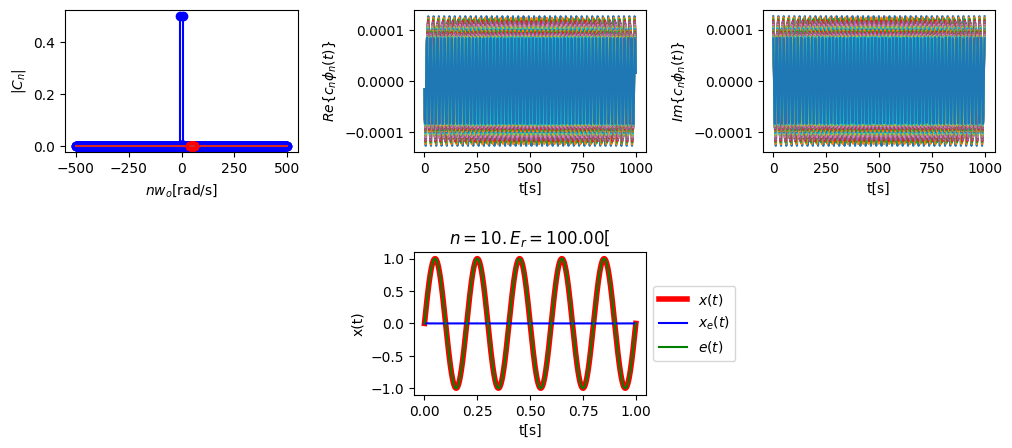

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros iniciales (según tu código original)
N = 50  # Número total de armónicos
A = 1   # Parámetro de amplitud
Px = (3*(A**4))/8  # Energía o potencia de la señal original

# Vector de tiempos y señal original (tv y xo)
tv = np.linspace(0, 1, 1000)  # Ejemplo de tiempos de 0 a 1 segundo
xo = np.sin(2 * np.pi * 5 * tv)  # Ejemplo de señal original (senoidal a 5 Hz)

# Transformada de Fourier (Cn)
Cn = np.fft.fft(xo) / len(xo)  # Coeficientes de Fourier normalizados
nv = np.fft.fftfreq(len(xo), d=(tv[1] - tv[0]))  # Frecuencias correspondientes

# Funciones base de Fourier (phin)
phin = np.exp(1j * 2 * np.pi * np.outer(tv, nv))

# Armónicos a utilizar
n = 10  # Número de armónicos para reconstrucción
ind = np.arange(N-n, N+n+1)  # Armónicos a considerar

# Cálculo de la reconstrucción usando los armónicos seleccionados
ce = (phin[:,ind]).dot(np.diag(Cn[ind]))  # Componentes espectrales
xe = (phin[:,ind]).dot(Cn[ind])  # Reconstrucción de la señal

# Error de reconstrucción
er = 1 - (np.sum(abs(Cn[ind])**2) / Px)  # Error de reconstrucción en términos de energía
et = xo - xe  # Error en el dominio temporal

# Graficar resultados
fig, ax = plt.subplots(2, 3, figsize=(12, 5))

# Magnitud del espectro de Fourier
ax[0,0].stem(nv, abs(Cn), 'b')  # Magnitud del espectro completo
ax[0,0].stem(nv[ind], abs(Cn[ind]), 'r')  # Magnitud de los armónicos seleccionados
ax[0,0].set_xlabel(r'$nw_o$[rad/s]')
ax[0,0].set_ylabel(r'$|C_n|$')

# Componentes espectrales (real e imaginario)
ax[0,1].plot(np.real(ce))  # Componente real
ax[0,1].set_xlabel('t[s]')
ax[0,1].set_ylabel('$Re\\{c_n\\phi_n(t)\\}$')

ax[0,2].plot(np.imag(ce))  # Componente imaginaria
ax[0,2].set_xlabel('t[s]')
ax[0,2].set_ylabel('$Im\\{c_n\\phi_n(t)\\}$')

# Señal original, reconstruida y error
ax[1,1].plot(tv, xo, 'r', linewidth=4, label='$x(t)$')  # Señal original
ax[1,1].plot(tv, xe, 'b', label='$x_e(t)$')  # Señal reconstruida
ax[1,1].plot(tv, et, 'g', label='$e(t)$')  # Error
ax[1,1].set_title('$n=%d. E_r=%.2f[%%]$' % (n, 100*er))
ax[1,1].set_xlabel('t[s]')
ax[1,1].set_ylabel('x(t)')
ax[1,1].legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Ocultar ejes vacíos
ax[1,0].axis('off')
ax[1,2].axis('off')

plt.subplots_adjust(wspace=0.5, hspace=0.7)
plt.show()

PREGUNTA 3 Sea la senal portadora ˜ c(t) = Ac sin(2πFct), con Ac, Fc ∈ R, y la senal mensaje ˜ m(t) ∈ R. Encuentre el espectro en
frecuencia de la senal modulada en amplitud (AM), ˜ y(t) = 
1 + m(t)
Ac

c(t). Luego, descargue desde youtube 5 segundos de
su cancion favorita (capturando del segundo 20 al 25). Presente una simulaci ´ on de modulaci ´ on por amplitud AM (tomando ´
como mensaje el fragmento de la cancion escogida). Grafique las se ´ nales en tiempo y frecuencia (magnitud y fase) de la ˜
senal mensaje, portadora y modulada. Reproduzca los fragmentos de audio del mensaje, portadora y se ˜ nal modulada. ˜ Nota:
se sugiere utilizar un canal de senal de audio para el desarrollo del ejercicio. El usuario debe poder escoger el ˜ ´ındice de
modulacion deseado.

In [6]:
#Se usa API youtube-dl para descargar  y extraer el audio en mp3.
!python3 -m pip install --force-reinstall https://github.com/yt-dlp/yt-dlp/archive/master.tar.gz

     / 2.7 MB 8.3 MB/s 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached certifi-2024.8.30-py3-none-any.whl.metadata (2.2 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached charset_normalizer-3.3.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (33 kB)
  Using cached idna-3.8-py3-none-any.whl.metadata (9.9 kB)
Using cached requests-2.32.3-py3-none-any.whl (64 kB)
Using cached certifi-2024.8.30-py3-none-any.whl (167 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.4/121.4 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.3/157.3 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.4/194.4 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 60.4 MB/s eta 0:00:00
Using cached charse

In [7]:
#Se pega el enlace del video a procesar
link="https://www.youtube.com/watch?v=ZA7ZKB8Mo9k"
!yt-dlp --extract-audio -o "audio" --audio-format mp3 {link}

[youtube] Extracting URL: https://www.youtube.com/watch?v=ZA7ZKB8Mo9k
[youtube] ZA7ZKB8Mo9k: Downloading webpage
[youtube] ZA7ZKB8Mo9k: Downloading ios player API JSON
[youtube] ZA7ZKB8Mo9k: Downloading web creator player API JSON
[youtube] ZA7ZKB8Mo9k: Downloading player 5f8f5b0f
[youtube] ZA7ZKB8Mo9k: Downloading m3u8 information
[info] ZA7ZKB8Mo9k: Downloading 1 format(s): 251
[download] Destination: audio
[download] 100% of    3.29MiB in 00:00:00 at 24.21MiB/s
[ExtractAudio] Destination: audio.mp3
Deleting original file audio (pass -k to keep)


In [8]:
#Se pasa el formato  a WAV para poder procesar.
!ffmpeg -y -i audio.mp3 output.wav

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [9]:
#Libreria para manipulación de archivos de audio
!pip install soundfile

In [10]:
import numpy as np
import soundfile as sf  # Librería para manejar archivos de audio

# Cargar archivo de audio WAV
nombre_out = "output.wav"
x, fs = sf.read(nombre_out)

# Convertir a mono si el audio tiene más de un canal
if x.ndim > 1:
    x = np.mean(x, axis=1)

# Obtener el fragmento entre los segundos 20 y 25
start_sample = int(20 * fs)
end_sample = int(25 * fs)
x_fragment = x[start_sample:end_sample]

# Mostrar la frecuencia de muestreo y nombre del archivo
print(f'Frecuencia de muestreo: {fs:.2f} Hz\naudio: {nombre_out}')

Frecuencia de muestreo: 48000.00 Hz
audio: output.wav


In [11]:
#Reproducir parte del tema escogida
from IPython.display import Audio
Audio(x_fragment, rate=fs)

In [15]:
import matplotlib.pyplot as plt

# Parámetros de la portadora
Fc = 10000  # Frecuencia de la portadora
Im = float(input("Ingrese el índice de modulación: "))  # Índice de modulación
Fs = 5 * Fc  # Frecuencia de muestreo

# Vector de tiempo basado en el fragmento de audio
t = np.arange(len(x_fragment)) / fs

# Normalización del fragmento de audio (mensaje)
m = x_fragment / np.max(np.abs(x_fragment))

# Calcular amplitud de la portadora usando el índice de modulación
Ac = np.max(np.abs(m)) / Im

# Generar señal portadora
c = Ac * np.sin(2 * np.pi * Fc * t)

# Mostrar la amplitud de la portadora
print(Ac)

Ingrese el índice de modulación: 0.6
1.6666666666666667


In [ ]:
GRAFICO DE TIEMPO Y FRECUENCIA


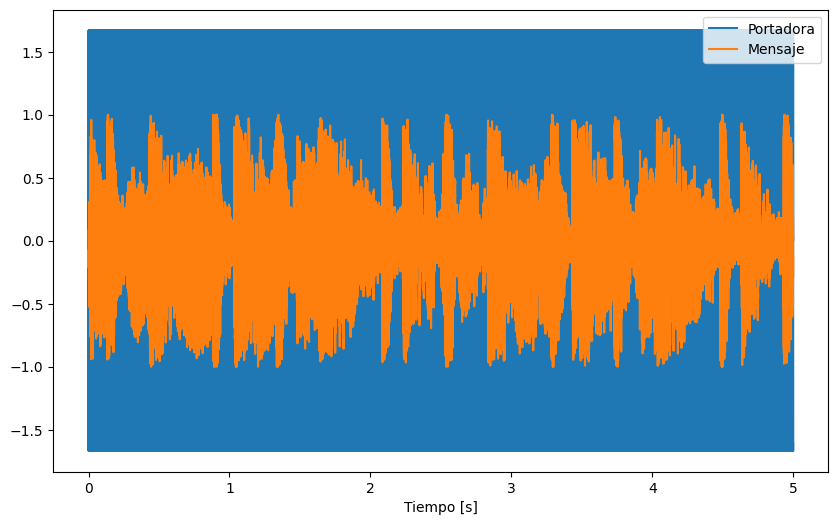

In [16]:
# Graficar la señal portadora y el mensaje
plt.figure(figsize=(10, 6))
plt.plot(t, c, label='Portadora')
plt.plot(t, m, label='Mensaje')
plt.legend()
plt.xlabel('Tiempo [s]')
plt.show()

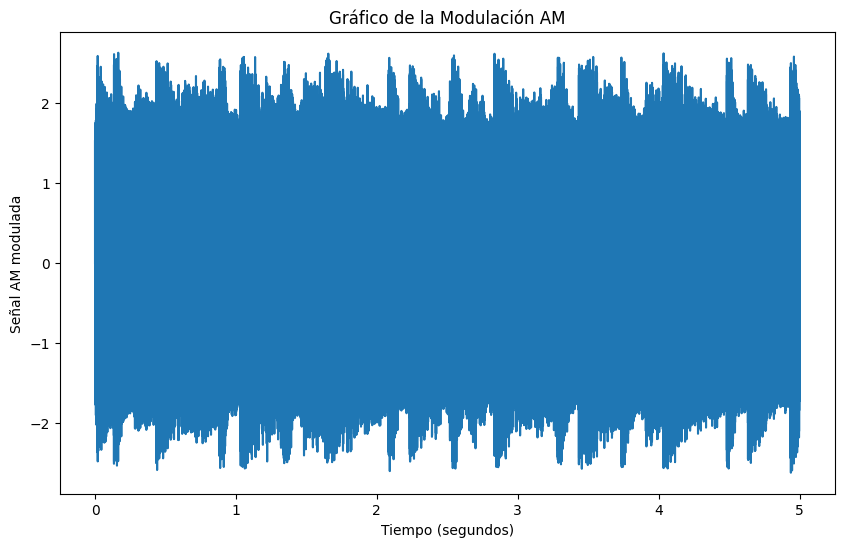

In [18]:
# Señal modulada en AM
y = (1 + m / Ac) * c

# Graficar la señal modulada AM
plt.figure(figsize=(10, 6))
plt.plot(t, y)
plt.xlabel('Tiempo (segundos)')
plt.ylabel('Señal AM modulada')
plt.title('Gráfico de la Modulación AM')
plt.show()

Se presenta el espectro de la señal mensaje, portadora y modulada.

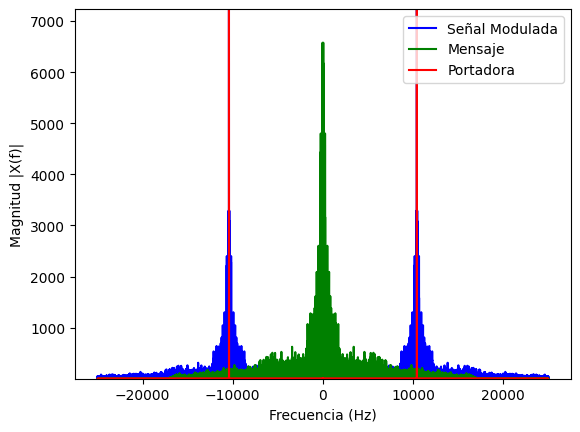

In [20]:
# Calcular la FFT de la portadora, el mensaje y la señal modulada
Xfc = np.fft.fft(c)
Xfm = np.fft.fft(m)
Xfy = np.fft.fft(y)

# Frecuencias correspondientes
vfre = np.fft.fftfreq(len(c), 1/Fs)

# Graficar las magnitudes de las FFT con diferentes colores
plt.plot(vfre, abs(Xfy), label='Señal Modulada', color='blue')
plt.plot(vfre, abs(Xfm), label='Mensaje', color='green')
plt.plot(vfre, abs(Xfc), label='Portadora', color='red')
plt.legend()
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud |X(f)|')
plt.ylim([min(abs(Xfm)), 1.1*max(abs(Xfm))])
plt.show()

In [21]:
#Reproducir la señal mensaje
print("Señal mensaje")
Audio(x_fragment, rate=fs)

Señal mensaje


In [22]:
#Reproducir la señal portadora
print("Señal portadora")
Audio(c, rate=fs)

Señal portadora


In [23]:
#Reproducir la señal modulada
print("Señal modulada")
Audio(y, rate=fs)

Señal modulada


PUNTO 4: Consulte en que consiste la distorsi ´ on total de arm ´ onicos ( ´ Total Harmonic Distortion-(THD)) y el factor de potencia en un
circuito electrico. C ´ omo puede calcularse el THD desde la FFT?. C ´ omo puede calcularse la distorsi ´ on del factor de potencia ´
con base al THD?. Genere un ejemplo ilustrativo para el calculo del THD y la distorsi ´ on del factor de potencia para un ´
rectificador de onda completa con carga: i) netamente resistiva y ii) carga RC en serie. Establezca las condiciones necesarias
para las simulaciones. El usuario podra escoger diferentes valores de R y C. Discuta los resultados obtenidos.

### Distorsión Total de Armónicos (THD) y Factor de Potencia en un Circuito Eléctrico

#### 1. **¿Qué es la Distorsión Total de Armónicos (THD)?**

La **Distorsión Total de Armónicos (THD)** es una medida de la distorsión en una señal eléctrica que es causada por la presencia de armónicos. Los armónicos son componentes de frecuencia que son múltiplos enteros de la frecuencia fundamental de la señal. La THD indica qué tan "limpia" es una señal comparada con una señal ideal, sin armónicos.


#### 2. **¿Qué es el Factor de Potencia (FP)?**

El **Factor de Potencia (FP)** es una medida de la eficiencia con la que una carga convierte la potencia aparente en potencia activa. Es el coseno del ángulo de desfase entre la corriente y el voltaje en un circuito AC.

**Fórmula del FP:**

Donde PHI es el ángulo de desfase entre la corriente y la tensión. En presencia de armónicos, el factor de potencia se puede ajustar considerando la distorsión causada por estos armónicos.

#### 3. **¿Cómo calcular el THD desde la FFT?**

Para calcular el THD usando la Transformada Rápida de Fourier (FFT):

1. **Obtener la FFT**: Realiza la FFT de la señal para obtener las magnitudes de las componentes de frecuencia.

2. **Identificar la frecuencia fundamental**: Encuentra la magnitud de la componente de frecuencia fundamental (el primer armónico).

3. **Calcular los armónicos**: Identifica las magnitudes de los armónicos (frecuencias que son múltiplos enteros de la fundamental).

4. **Aplicar la fórmula del THD**: Usa la fórmula del THD para calcular la distorsión.

#### 4. **¿Cómo calcular la distorsión del factor de potencia con base al THD?**

Donde:
- \( THD \) es la Distorsión Total de Armónicos calculada previamente.

Este ajuste se basa en que la distorsión armónica introduce componentes de potencia reactiva que afectan el factor de potencia.





THD: 79481469914536512.00
Factor de potencia ajustado: 0.00


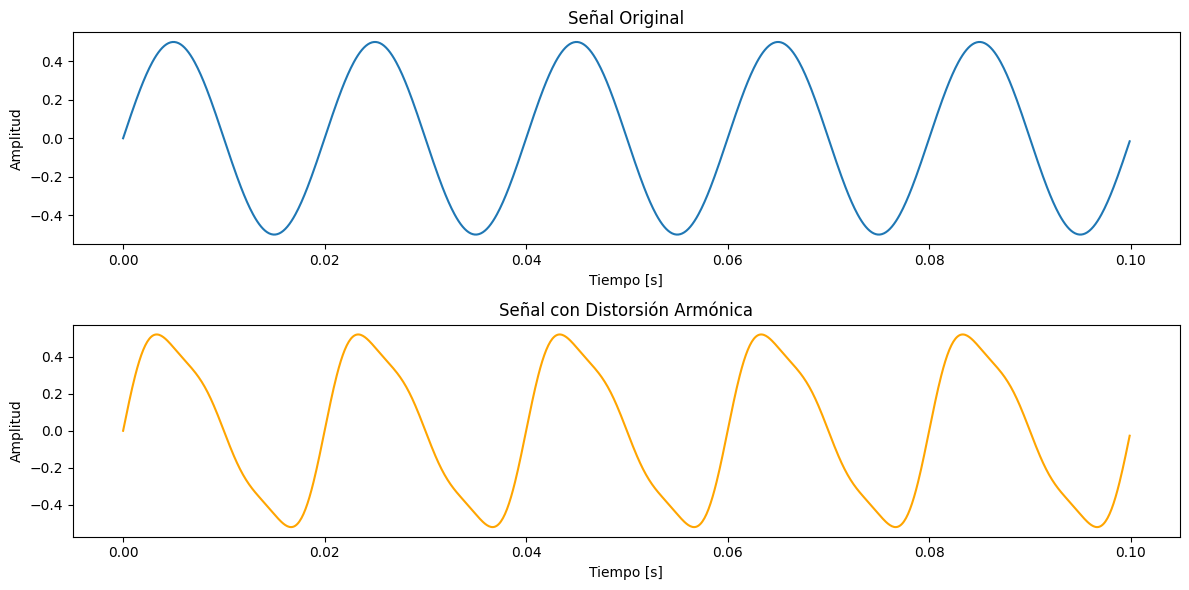

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Configuración
Fs = 10000  # Frecuencia de muestreo en Hz
T = 1.0 / Fs  # Periodo de muestreo
L = 1000  # Número de muestras
t = np.linspace(0.0, L * T, L, endpoint=False)  # Vector de tiempo

# Generar una señal de entrada (senoidal)
f0 = 50  # Frecuencia de la señal en Hz
x = 0.5 * np.sin(2 * np.pi * f0 * t)  # Señal senoidal

# Simulación de una señal con distorsión armónica (ejemplo de rectificador)
def add_harmonics(signal, Fs):
    # Agregar armónicos a la señal
    harmonic1 = 0.1 * np.sin(2 * np.pi * 2 * f0 * t)  # Segundo armónico
    harmonic2 = 0.05 * np.sin(2 * np.pi * 3 * f0 * t)  # Tercer armónico
    return signal + harmonic1 + harmonic2

x_distorted = add_harmonics(x, Fs)

# Calcular la FFT
def calculate_thd(signal, Fs):
    N = len(signal)
    yf = fft(signal)
    xf = fftfreq(N, 1 / Fs)
    magnitude = np.abs(yf[:N // 2])

    # Frecuencia fundamental
    fundamental = magnitude[np.argmax(xf[:N // 2])]

    # Armónicos
    harmonics = magnitude[1:]  # Excluir la frecuencia fundamental

    # THD
    thd = np.sqrt(np.sum(harmonics**2)) / fundamental
    return thd

# Calcular THD
thd = calculate_thd(x_distorted, Fs)
print(f'THD: {thd:.2f}')

# Calcular el factor de potencia ajustado por THD
def calculate_power_factor(thd):
    return 1 / np.sqrt(1 + thd**2)

power_factor = calculate_power_factor(thd)
print(f'Factor de potencia ajustado: {power_factor:.2f}')

# Graficar la señal original y distorsionada
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, x, label='Señal Original')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.title('Señal Original')

plt.subplot(2, 1, 2)
plt.plot(t, x_distorted, label='Señal Distorsionada', color='orange')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.title('Señal con Distorsión Armónica')

plt.tight_layout()
plt.show()

- **THD**: Un valor alto de THD indica una mayor distorsión en la señal debido a la presencia de armónicos. Esto puede degradar la calidad de la señal y afectar el rendimiento de los equipos eléctricos.

- **Factor de Potencia**: Un factor de potencia bajo indica una eficiencia menor en la conversión de potencia activa, y se ve afectado negativamente por la presencia de armónicos. Ajustar el factor de potencia basado en THD ayuda a comprender el impacto de los armónicos en la eficiencia del sistema.

In [25]:
def rectifier_resistive_load(x):
    # Rectificador de onda completa con carga resistiva
    return np.abs(x)

# Parámetros de la carga resistiva
R = 10  # Resistencia en ohmios

# Aplicar el rectificador
x_rectified = rectifier_resistive_load(x)

In [26]:
def rectifier_rc_load(x, R, C, Fs):
    # Rectificador de onda completa con carga RC en serie
    dt = 1 / Fs
    RC = R * C
    y = np.zeros_like(x)
    for i in range(1, len(x)):
        y[i] = y[i-1] + dt * (x[i] - y[i-1]) / RC
    return np.abs(y)

# Parámetros de la carga RC
R = 10  # Resistencia en ohmios
C = 1e-4  # Capacitancia en faradios

# Aplicar el rectificador
x_rectified_rc = rectifier_rc_load(x, R, C, Fs)

In [27]:
def calculate_thd(signal, Fs):
    # Calcular la FFT
    N = len(signal)
    yf = fft(signal)
    xf = fftfreq(N, 1 / Fs)

    # Magnitud de las frecuencias
    magnitude = np.abs(yf[:N // 2])

    # Frecuencia fundamental
    fundamental = magnitude[1]

    # Armónicos
    harmonics = magnitude[2:]

    # THD
    thd = np.sqrt(np.sum(harmonics**2)) / fundamental
    return thd

# Calcular THD para las señales rectificadas
thd_resistive = calculate_thd(x_rectified, Fs)
thd_rc = calculate_thd(x_rectified_rc, Fs)

print(f'THD con carga resistiva: {thd_resistive:.2f}')
print(f'THD con carga RC: {thd_rc:.2f}')

THD con carga resistiva: 4191089556636864.50
THD con carga RC: 1857.56


In [28]:
def calculate_power_factor(thd):
    # Factor de potencia ajustado por THD
    return 1 / np.sqrt(1 + thd**2)

# Calcular factor de potencia para ambas cargas
power_factor_resistive = calculate_power_factor(thd_resistive)
power_factor_rc = calculate_power_factor(thd_rc)

print(f'Factor de potencia con carga resistiva: {power_factor_resistive:.2f}')
print(f'Factor de potencia con carga RC: {power_factor_rc:.2f}')

Factor de potencia con carga resistiva: 0.00
Factor de potencia con carga RC: 0.00


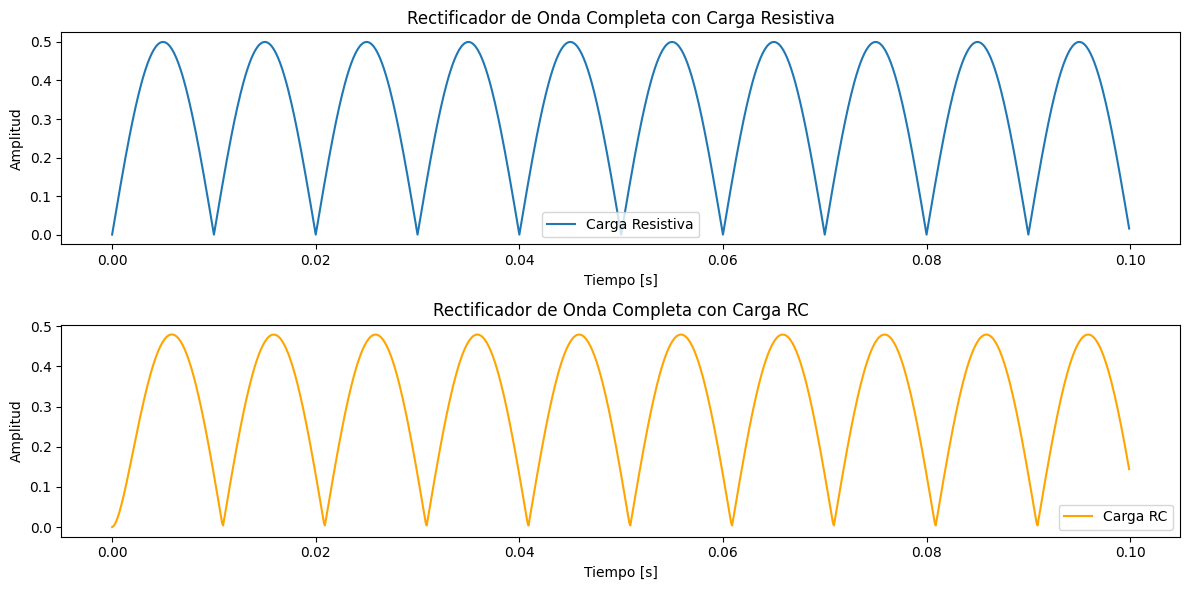

In [29]:
# Graficar señal rectificada con carga resistiva
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, x_rectified, label='Carga Resistiva')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.title('Rectificador de Onda Completa con Carga Resistiva')
plt.legend()

# Graficar señal rectificada con carga RC
plt.subplot(2, 1, 2)
plt.plot(t, x_rectified_rc, label='Carga RC', color='orange')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.title('Rectificador de Onda Completa con Carga RC')
plt.legend()

plt.tight_layout()
plt.show()

THD con Carga Resistiva: La distorsión total de armónicos (THD) para una carga resistiva es generalmente baja porque esta carga no introduce armónicos adicionales. Esto resulta en un factor de potencia cercano a 1, indicando una operación eficiente del rectificador.

THD con Carga RC: La carga RC introduce armónicos adicionales debido a la no linealidad del circuito. Esto aumenta el THD y disminuye el factor de potencia, ya que los armónicos contribuyen a la potencia reactiva, lo que puede afectar la eficiencia del sistema.